# Section 3 Experiments

### Results

We have decided to dig into the effects of different parameters. For both CNN and ResNet model, the hyperparameters are as below

- Dropout Rate
- Learning Rate
- Patience of Early Stopping
- Batch Size


For the model outputs, some checkpoints were saved when they have obtained the best performance at that moment. We have vectorized the checkpoints and save as copies for later visualisations.

In [9]:
# Then we could load the saved checkpoints and visualise them.
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
print(f'We have saved {len(os.listdir("vectors/"))} data, {len(glob("vectors/CNN*"))} for CNN model and {len(glob("vectors/RESNET*"))} for ResNet model')
print(os.listdir('vectors/'))


We have saved 15 data, 7 for CNN model and 8 for ResNet model
['CNN_0.23do1e-4lr32bs.npy', 'CNN_0.23do1e-4lr64bs.npy', 'CNN_0.23do3e-3lr32bs.npy', 'CNN_0.23do3e-3lr64bs.npy', 'CNN_0.2do3e-2lr32bs.npy', 'CNN_0.2do3e-3lr32bs.npy', 'CNN_0.2do3e-3lr64bs.npy', 'RESNET_0.23do0.0003lr32bs.npy', 'RESNET_0.23do3e-3lr64bs.npy', 'RESNET_0.23do3e-4lr32bs.npy', 'RESNET_0.2do3e-3lr32bs.npy', 'RESNET_0.2do3e-3lr64bs.npy', 'RESNET_0.3do0.003lr32bs.npy', 'RESNET_0.3do3e-3lr32bs.npy', 'RESNET_0.3do3e-3lr64bs.npy']


_**Short Terms**_

do -> Dropout Rate

lr -> Learning Rate

bs -> Batch Size

### CNN Models performance

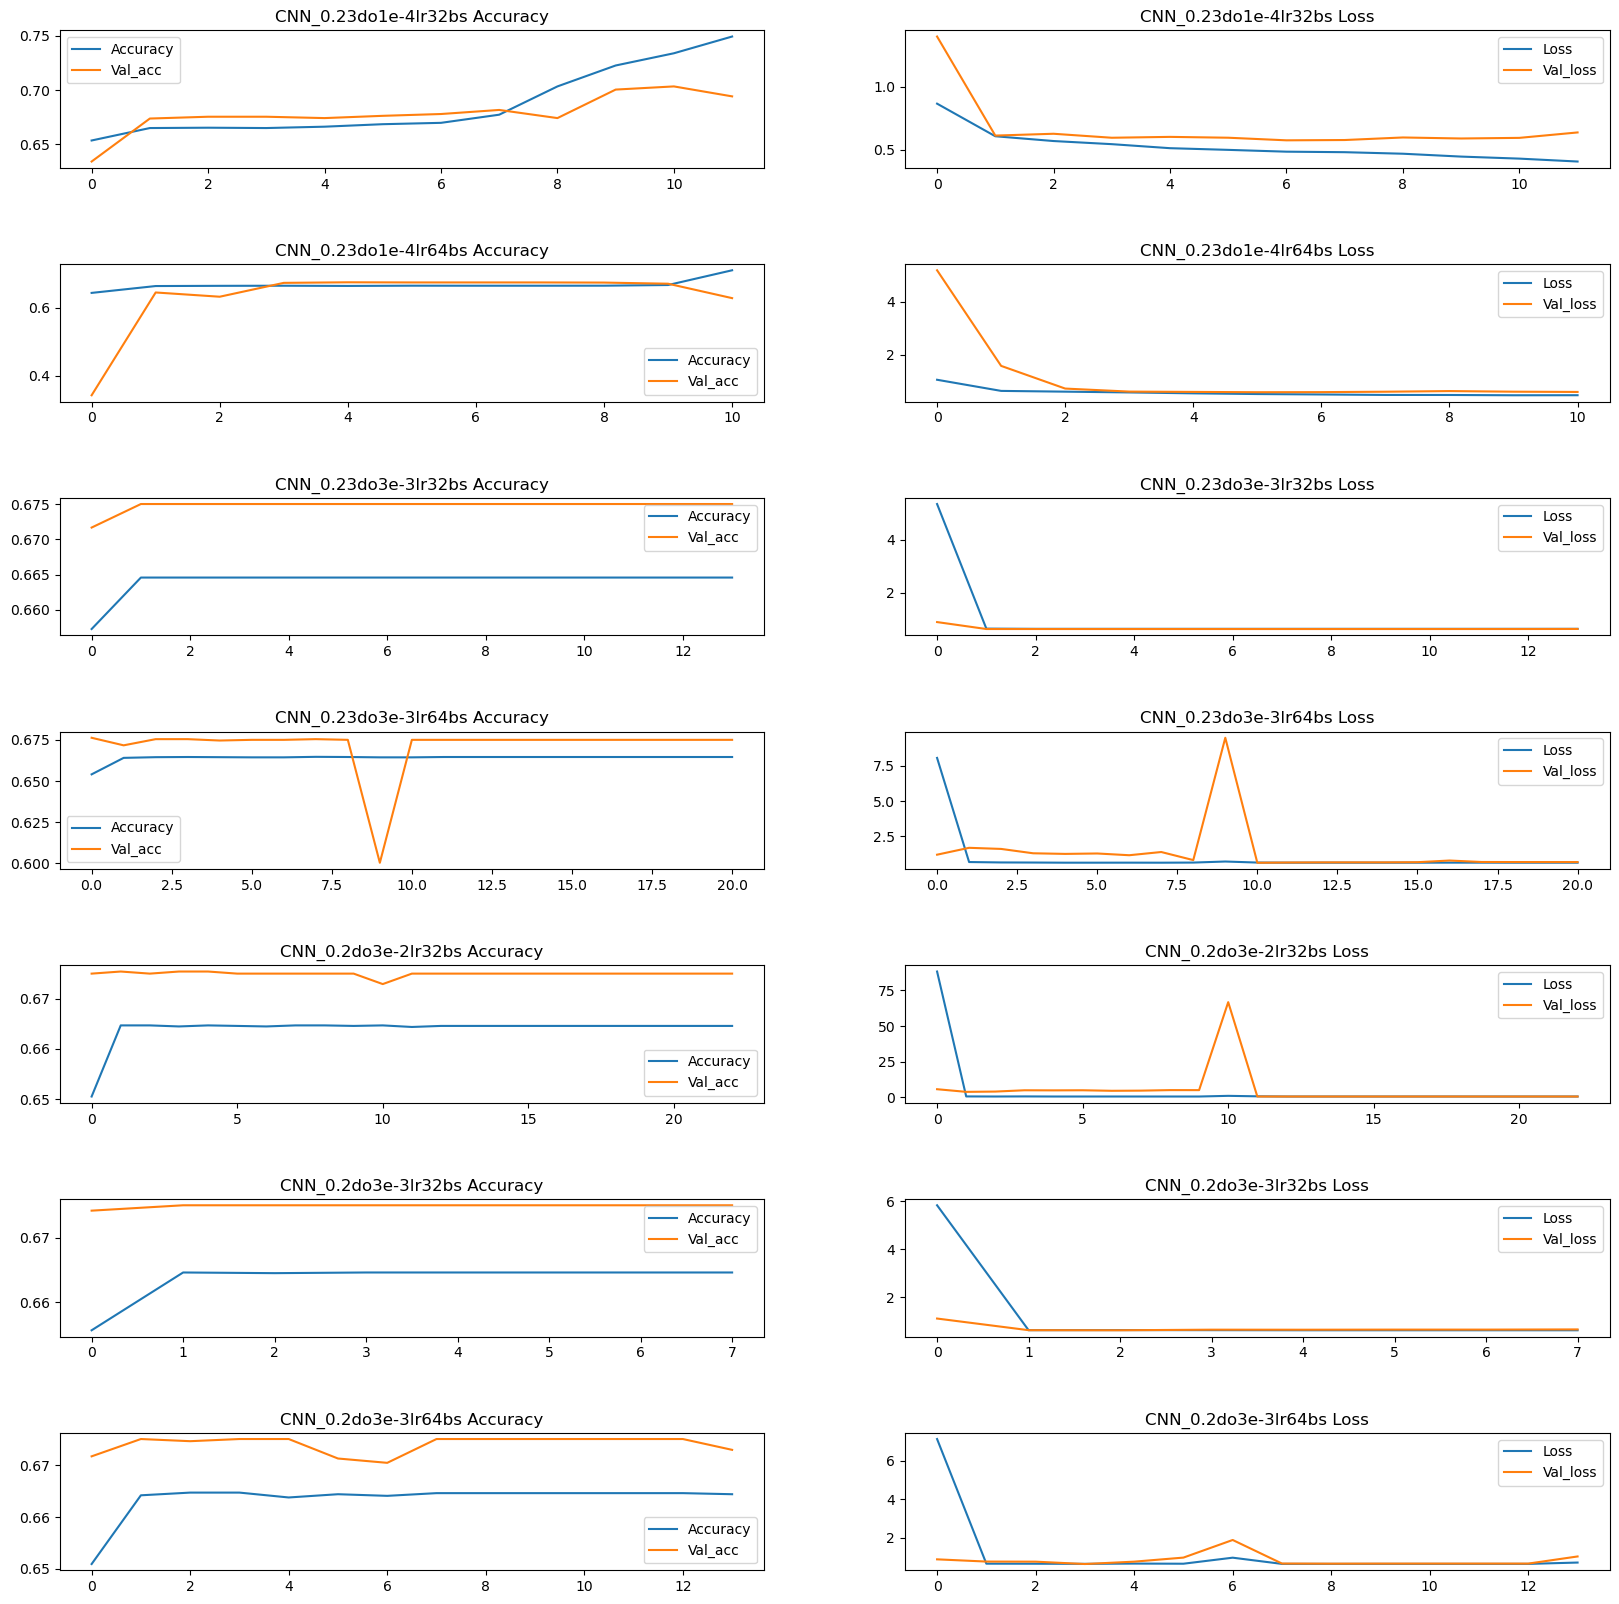

In [10]:
CNN = glob('vectors/CNN*')
rows = len(CNN)
fig,axs = plt.subplots(rows, 2,figsize=(20,20))
for row,data in enumerate(CNN):
    title = os.path.split(data[:-4])[1]
    d = np.load(data)
    axs[row,0].plot(d[:,0],label='Accuracy');axs[row,0].plot(d[:,1],label='Val_acc')
    axs[row,1].plot(d[:,2],label='Loss');axs[row,1].plot(d[:,3],label='Val_loss')
    axs[row,0].set_title(f'{title} Accuracy');axs[row,1].set_title(f'{title} Loss')
    axs[row,0].legend(loc='best');axs[row,1].legend(loc='best')
plt.subplots_adjust(hspace = 0.7)

We could notice that learning rate of 3e-3 has a more stable accuracy with fixed batch size

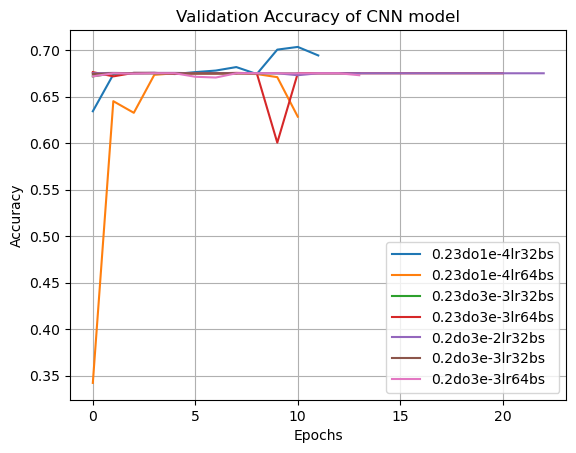

In [11]:
for data in CNN:
    config = data[data.find('_')+1:][:-4]
    d = np.load(data) # accuracy val_accuracy loss val_loss
    plt.plot(d[:,1], label=config)
plt.legend(loc='lower right')
plt.title('Validation Accuracy of CNN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

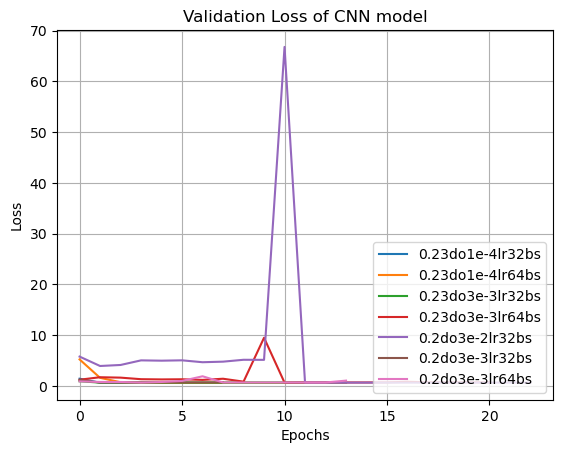

In [12]:
for data in CNN:
    config = data[data.find('_')+1:][:-4]
    d = np.load(data) # accuracy val_accuracy loss val_loss
    plt.plot(d[:,3], label=config)
plt.legend(loc='lower right')
plt.title('Validation Loss of CNN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

123

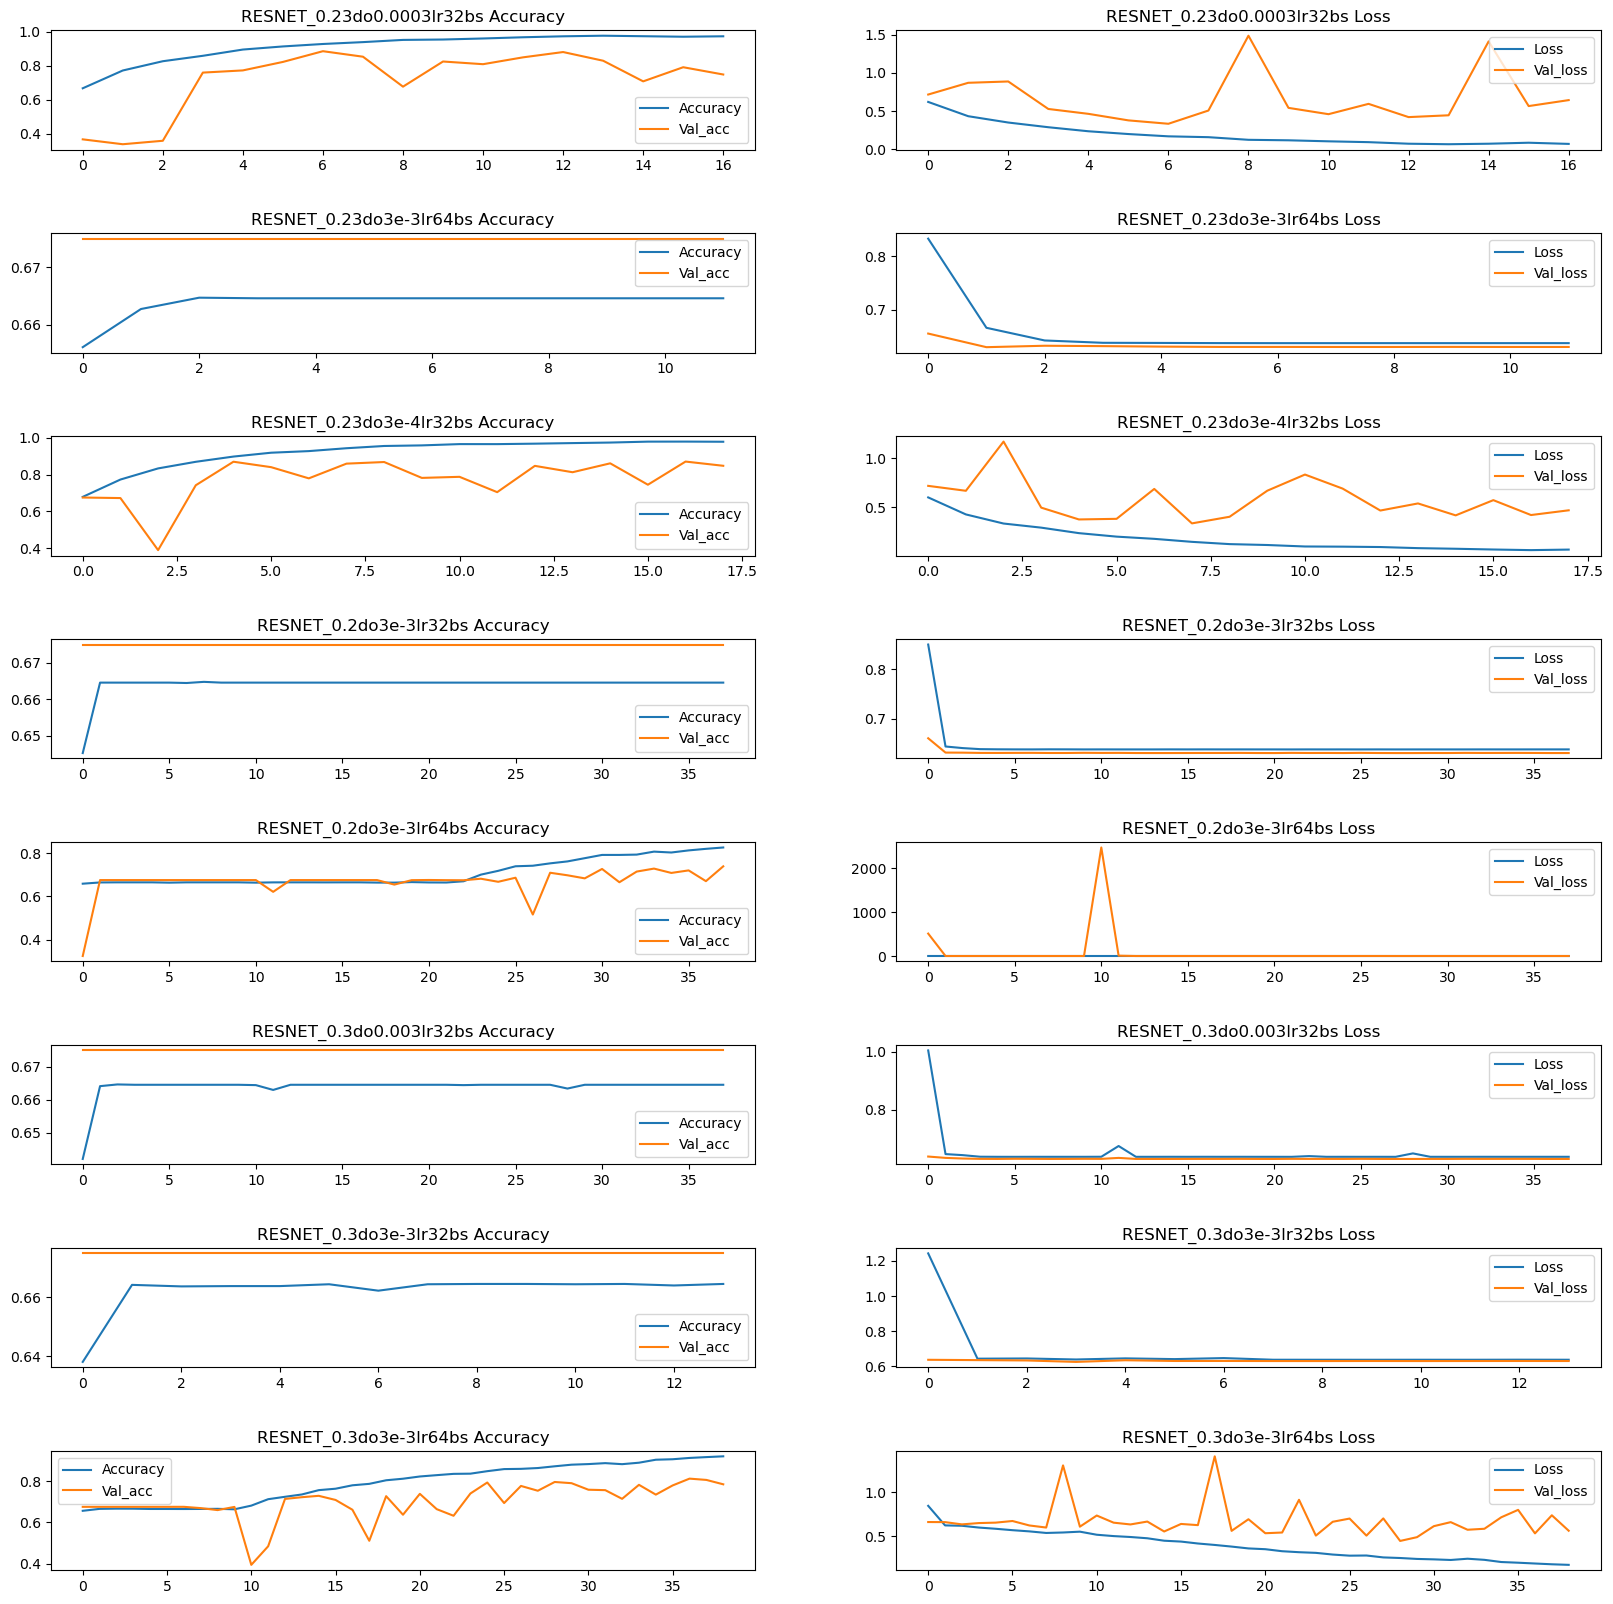

In [13]:
RESNET = glob('vectors/RESNET*')
rows = len(RESNET)
fig,axs = plt.subplots(rows, 2,figsize=(20,20))
for row,data in enumerate(RESNET):
    title = os.path.split(data[:-4])[1]
    d = np.load(data)
    axs[row,0].plot(d[:,0],label='Accuracy');axs[row,0].plot(d[:,1],label='Val_acc')
    axs[row,1].plot(d[:,2],label='Loss');axs[row,1].plot(d[:,3],label='Val_loss')
    axs[row,0].set_title(f'{title} Accuracy');axs[row,1].set_title(f'{title} Loss')
    axs[row,0].legend(loc='best');axs[row,1].legend(loc='best')
plt.subplots_adjust(hspace = 0.7)

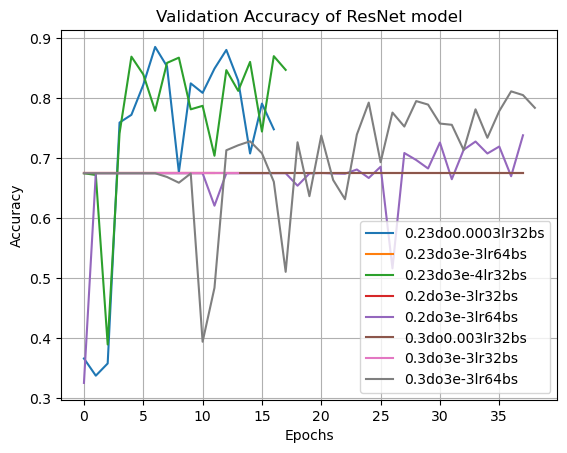

In [14]:
for data in RESNET:
    config = data[data.find('_')+1:][:-4]
    d = np.load(data) # accuracy val_accuracy loss val_loss
    plt.plot(d[:,1], label=config)
plt.legend(loc='lower right')
plt.title('Validation Accuracy of ResNet model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

We could see that the lowest learning rate have the largest validation accuracy compared with a higher value in learning rate.

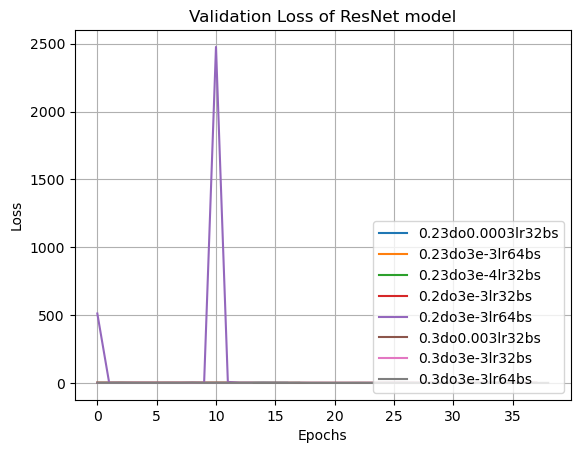

In [15]:
for data in RESNET:
    config = data[data.find('_') + 1:][:-4]
    d = np.load(data)  # accuracy val_accuracy loss val_loss
    plt.plot(d[:, 3], label=config)
plt.legend(loc='lower right')
plt.title('Validation Loss of ResNet model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

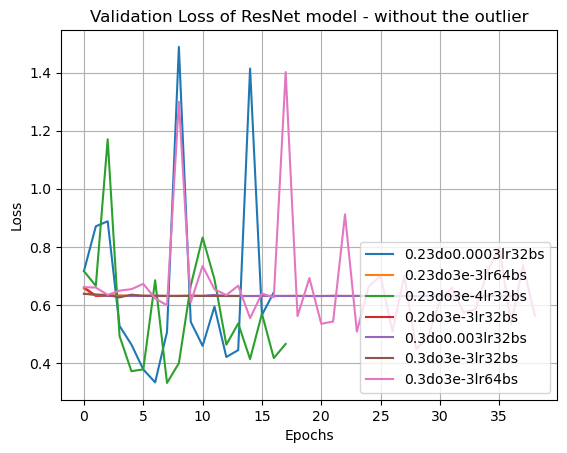

In [16]:
removed_outlier = RESNET.copy()
removed_outlier.remove('vectors\\RESNET_0.2do3e-3lr64bs.npy')
for data in removed_outlier:
    config = data[data.find('_') + 1:][:-4]
    d = np.load(data)  # accuracy val_accuracy loss val_loss
    plt.plot(d[:, 3], label=config)
plt.legend(loc='lower right')
plt.title('Validation Loss of ResNet model - without the outlier')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()